# MLP Classifier

In [70]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set(font='Malgun Gothic',
       rc={'axes.unicode_minus':False})

import os
import warnings
warnings.filterwarnings(action='ignore')

fold_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'

In [71]:
#train = pd.read_pickle(fold_dir+'train_0602.pkl')
#test = pd.read_pickle(fold_dir+'test_0602.pkl')

In [72]:
#data = pd.concat([train, test], axis=0)
#data.shape

(274, 26)

In [73]:
data = pd.read_pickle(fold_dir+'final_data_0604.pkl')
data.shape

(234, 29)

In [74]:
pd.options.display.max_columns = 28
data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,한우가격_미래값(y값),lag1_price,lag5_price,...,lag20_price,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%),일강수량,diff,class
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,11398.7,11817.4,11752.4,10939.8,...,12377.200,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143,1.166667,-168.8,하강
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,11784.9,11648.6,11817.4,11203.4,...,12380.800,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000,8.966667,98.8,상승
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,11733.0,11747.4,11648.6,10954.8,...,12001.333,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571,1.800000,299.4,상승
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,11698.0,12046.8,11747.4,11045.0,...,12000.400,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143,0.766667,46.2,상승
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,11897.1,12093.0,12046.8,11752.4,...,11728.250,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286,7.200000,-181.4,하강


In [75]:
del data['한우가격_미래값(y값)']
data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,lag1_price,lag5_price,lag10_price,lag20_price,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%),일강수량,diff,class
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,11398.7,11752.4,10939.8,12167.4,12377.200,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143,1.166667,-168.8,하강
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,11784.9,11817.4,11203.4,11843.4,12380.800,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000,8.966667,98.8,상승
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,11733.0,11648.6,10954.8,11429.0,12001.333,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571,1.800000,299.4,상승
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,11698.0,11747.4,11045.0,11594.2,12000.400,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143,0.766667,46.2,상승
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,11897.1,12046.8,11752.4,11702.4,11728.250,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286,7.200000,-181.4,하강


In [25]:
# y값 labeling
'''
label_list = []
for i in range(0, len(data['주간날짜'])-1):
    a = data['한우가격_당일값'][i] - data['한우가격_당일값'][i+1]
    label_list.append(a)
label_list.insert(273, 0)
data['y_차이'] = np.array(label_list)
data['y_차이_label'] = '' 
data.loc[data['y_차이'] > 0, 'y_차이_label'] =  '증가'
data.loc[data['y_차이'] == 0, 'y_차이_label'] =  '변동없음'
data.loc[data['y_차이'] < 0, 'y_차이_label'] =  '감소'
data.head()
'''

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       'lag1_price', 'lag5_price', 'lag10_price', 'lag20_price', '평균기온',
       '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도',
       '최소상대습도(%)', '평균상대습도(%)', 'y_차이'],
      dtype='object')

In [80]:
not_cols = ['diff']
final_data = data.drop(not_cols, axis=1)
final_data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,lag1_price,lag5_price,lag10_price,lag20_price,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%),일강수량,class
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,11398.7,11752.4,10939.8,12167.4,12377.200,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143,1.166667,2
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,11784.9,11817.4,11203.4,11843.4,12380.800,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000,8.966667,1
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,11733.0,11648.6,10954.8,11429.0,12001.333,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571,1.800000,1
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,11698.0,11747.4,11045.0,11594.2,12000.400,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143,0.766667,1
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,11897.1,12046.8,11752.4,11702.4,11728.250,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286,7.200000,2


In [77]:
from sklearn import preprocessing

In [81]:
le_class = preprocessing.LabelEncoder()
final_data['class'] = le_class.fit_transform(final_data['class'])
final_data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,lag1_price,lag5_price,lag10_price,lag20_price,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%),일강수량,class
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,11398.7,11752.4,10939.8,12167.4,12377.200,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143,1.166667,2
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,11784.9,11817.4,11203.4,11843.4,12380.800,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000,8.966667,1
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,11733.0,11648.6,10954.8,11429.0,12001.333,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571,1.800000,1
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,11698.0,11747.4,11045.0,11594.2,12000.400,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143,0.766667,1
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,11897.1,12046.8,11752.4,11702.4,11728.250,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286,7.200000,2


In [82]:
final_data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       'lag1_price', 'lag5_price', 'lag10_price', 'lag20_price', '평균기온',
       '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도',
       '최소상대습도(%)', '평균상대습도(%)', '일강수량', 'class'],
      dtype='object')

In [83]:
features = ['한우가격_당일값_편차','한우가격_당일값','한우가격_미래값(y값)_MA','평균기온',
           '최저기온','최고기온','합계일조시간','합계일사','최대 순간 풍속']
print(features)

['한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속']


In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MaxAbsScaler()
kf = KFold(n_splits=5, shuffle=True)

accrs = []
fold_idx = 1

for train_idx, test_idx in kf.split(data):
    print(f'Fold 횟수 : {fold_idx}')
    train_d, test_d = data.iloc[train_idx], data.iloc[test_idx]
    
    pca = PCA(n_components=7)
    
    train_y = train_d['class']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['class']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
                                    # L2 normalization(파라미터 커지는거 제한)
    model = MLPClassifier(max_iter=500, alpha=0.0005, random_state=1)
    model.fit(train_x, train_y)
    
    train_accr = model.score(train_x, train_y)
    test_accr = model.score(test_x, test_y)
    print('Train accuracy :', train_accr)
    print('Test accuracy :', test_accr)
    
    accrs.append(test_accr)
    fold_idx += 1
print()
print("전체 평균 Accuracy :", np.average(accrs))
    
# optimization converge안되는 문제 어떻게 해결할까...?

Fold 횟수 : 1
Train accuracy : 0.6524064171122995
Test accuracy : 0.574468085106383
Fold 횟수 : 2
Train accuracy : 0.6363636363636364
Test accuracy : 0.5957446808510638
Fold 횟수 : 3
Train accuracy : 0.6310160427807486
Test accuracy : 0.574468085106383
Fold 횟수 : 4
Train accuracy : 0.5989304812834224
Test accuracy : 0.5957446808510638
Fold 횟수 : 5
Train accuracy : 0.6808510638297872
Test accuracy : 0.5434782608695652

전체 평균 Accuracy : 0.5767807585568917


# VAR모형

In [5]:
data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,한우가격_미래값(y값),lag1_price,lag5_price,lag10_price,lag20_price,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,11398.7,11817.4,11752.4,10939.8,12167.4,12377.200,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143
1,2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,11784.9,11648.6,11817.4,11203.4,11843.4,12380.800,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000
2,2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,11733.0,11747.4,11648.6,10954.8,11429.0,12001.333,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571
3,2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,11698.0,12046.8,11747.4,11045.0,11594.2,12000.400,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143
4,2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,11897.1,12093.0,12046.8,11752.4,11702.4,11728.250,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286


In [7]:
df = data.set_index('주간날짜').copy()
df.head()

,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,한우가격_미래값(y값),lag1_price,lag5_price,lag10_price,lag20_price,평균기온,최저기온,최고기온,합계일조시간,합계일사,최대 순간 풍속,최대 풍속(m/s),평균지면온도,최소상대습도(%),평균상대습도(%)
주간날짜,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-09,1590,1014,22.851852,39.851852,215700.0,4252.75,0,-3.059150,11752.4,11398.7,11817.4,11752.4,10939.8,12167.4,12377.200,19.885714,17.071429,23.157143,4.871429,15.528571,5.585714,2.985714,25.057143,61.000000,79.357143
2013-06-16,1590,1014,22.851852,39.851852,215700.0,4613.20,0,62.086524,11817.4,11784.9,11648.6,11817.4,11203.4,11843.4,12380.800,23.700000,20.900000,26.842857,4.385714,14.534286,6.285714,3.471429,26.857143,53.571429,72.400000
2013-06-23,1590,1014,22.851852,39.851852,215700.0,4482.80,0,-109.535591,11648.6,11733.0,11747.4,11648.6,10954.8,11429.0,12001.333,22.842857,19.957143,26.642857,5.914286,18.434286,6.528571,3.971429,28.028571,54.142857,75.428571
2013-06-30,1590,1014,22.851852,39.851852,215700.0,4133.00,0,-5.973174,11747.4,11698.0,12046.8,11747.4,11045.0,11594.2,12000.400,27.542857,23.371429,31.628571,7.042857,18.040000,10.385714,5.700000,28.857143,42.714286,60.357143
2013-07-07,1563,1041,-4.148148,66.851852,229410.0,3971.60,0,293.675708,12046.8,11897.1,12093.0,12046.8,11752.4,11702.4,11728.250,25.857143,23.600000,29.257143,3.157143,10.810000,8.114286,4.342857,27.757143,56.714286,77.314286


In [13]:
y_data = df['한우가격_당일값']
y_data.head(2)

주간날짜
2013-06-09    11752.4
2013-06-16    11817.4
Name: 한우가격_당일값, dtype: float64

In [17]:
# train, test split
train = df[:int(0.8*len(data))]
test = df[int(0.8*len(data)):]
print('train shape :', train.shape)
print('test shape :', test.shape)

train shape : (219, 25)
test shape : (55, 25)


In [18]:
# fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [24]:
cols = test.columns.tolist()

In [55]:
pred = pd.DataFrame(prediction, columns=cols)
pred.shape

(55, 25)

In [67]:
test['y_var'] = np.array(pred['한우가격_미래값(y값)'])
test.columns

Index(['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '돼지가격_평균',
       '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA', '한우가격_미래값(y값)',
       'lag1_price', 'lag5_price', 'lag10_price', 'lag20_price', '평균기온',
       '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도',
       '최소상대습도(%)', '평균상대습도(%)', 'y_var'],
      dtype='object')

In [68]:
vs_df = test[['한우가격_미래값(y값)','y_var']]
vs_df.head()

,한우가격_미래값(y값),y_var
주간날짜,,
2017-08-20,17141.6,16891.870979
2017-08-27,17234.0,16740.986145
2017-09-03,17446.4,16478.878884
2017-09-10,17399.6,16394.219053
2017-09-17,17726.0,16375.623241


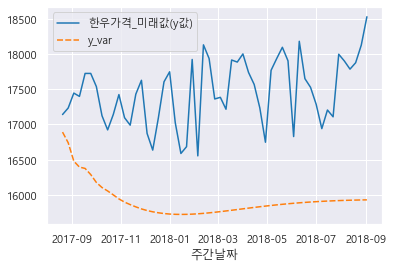

In [69]:
sns.lineplot(data=vs_df, palette='tab10')